In [2]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, median_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression


Download and use the FIFA 19 Complete Player Dataset from Kaggle. This data set is about every player information present in the EA Sports Video Game, FIFA 2019. For each player, there is data with respect to different features being of nature personal, performance and preferences

In [5]:
# load dataset
fifa_df = pd.read_csv('CompleteDataset.csv')
fifa_df.head()

,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,...,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
fifa_df.describe()

,Unnamed: 0,Age,Overall,Potential,Special,CAM,CB,CDM,CF,CM,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
count,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,...,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000
mean,8990.000000,25.144541,66.247984,71.190813,1594.095100,59.251755,55.550464,56.865283,59.030028,58.506833,...,56.979689,55.550464,58.506833,56.865283,59.030028,60.057736,58.204050,59.359265,57.698721,58.204050
std,5190.811931,4.614272,6.987965,6.102199,272.151435,9.880164,12.192579,10.310178,9.926988,8.888040,...,9.791627,12.192579,8.888040,10.310178,9.926988,9.349180,9.181392,9.978084,9.142825,9.181392
min,0.000000,16.000000,46.000000,46.000000,728.000000,27.000000,25.000000,26.000000,27.000000,30.000000,...,30.000000,25.000000,30.000000,26.000000,27.000000,28.000000,31.000000,26.000000,31.000000,31.000000
25%,4495.000000,21.000000,62.000000,67.000000,1449.000000,53.000000,45.000000,49.000000,53.000000,53.000000,...,50.000000,45.000000,53.000000,49.000000,53.000000,54.000000,52.000000,53.000000,51.000000,52.000000
50%,8990.000000,25.000000,66.000000,71.000000,1633.000000,60.000000,57.000000,58.000000,60.000000,59.000000,...,58.000000,57.000000,59.000000,58.000000,60.000000,61.000000,59.000000,60.000000,58.000000,59.000000
75%,13485.000000,28.000000,71.000000,75.000000,1786.000000,66.000000,65.000000,65.000000,66.000000,65.000000,...,64.000000,65.000000,65.000000,65.000000,66.000000,67.000000,65.000000,66.000000,64.000000,65.000000
max,17980.000000,47.000000,94.000000,94.000000,2291.000000,92.000000,87.000000,85.000000,92.000000,87.000000,...,84.000000,87.000000,87.000000,85.000000,92.000000,90.000000,92.000000,91.000000,84.000000,92.000000


There are 75 features present in the dataset; now looking at the different features present 

In [8]:
fifa_df.columns #list all the columns 

Index(['Unnamed: 0', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control',
       'Composure', 'Crossing', 'Curve', 'Dribbling', 'Finishing',
       'Free kick accuracy', 'GK diving', 'GK handling', 'GK kicking',
       'GK positioning', 'GK reflexes', 'Heading accuracy', 'Interceptions',
       'Jumping', 'Long passing', 'Long shots', 'Marking', 'Penalties',
       'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys', 'CAM', 'CB', 'CDM', 'CF', 'CM', 'ID',
       'LAM', 'LB', 'LCB', 'LCM', 'LDM', 'LF', 'LM', 'LS', 'LW', 'LWB',
       'Preferred Positions', 'RAM', 'RB', 'RCB', 'RCM', 'RDM', 'RF', 'RM',
       'RS', 'RW', 'RWB', 'ST'],
      dtype='object')

Being a big football fan and observer, I have played the FIFA game when I was young and the data collected for this game is very near to real figures. So I asked myself the following 5 questions which should be answerable by analyzing the complete dataset. 
1.	What is the age distribution of the players? 
2.	From what countries the majority players come from	? 
3.	What are the most preferred positions? 
4.	What are the top 10 clubs with highest average player potential? 
5.	Correlation between Age, Overall, Potential, Value and Wage


Looking at the dataset with respect to missing values and columns which can't be used for analysis 

In [9]:
# about the missing values for each column
fifa_df.isnull().sum()

Unnamed: 0                0
Name                      0
Age                       0
Photo                     0
Nationality               0
Flag                      0
Overall                   0
Potential                 0
Club                    248
Club Logo                 0
Value                     0
Wage                      0
Special                   0
Acceleration              0
Aggression                0
Agility                   0
Balance                   0
Ball control              0
Composure                 0
Crossing                  0
Curve                     0
Dribbling                 0
Finishing                 0
Free kick accuracy        0
GK diving                 0
GK handling               0
GK kicking                0
GK positioning            0
GK reflexes               0
Heading accuracy          0
                       ... 
Vision                    0
Volleys                   0
CAM                    2029
CB                     2029
CDM                 

The figure 2029 refers to the number of Goal Keepers in the list. That's why for Goalkeepers we don't have ratings for other positions 

In [10]:
# columns having no missing values 
fifa_df.columns[np.sum(fifa_df.isnull()) == 0 ]

Index(['Unnamed: 0', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club Logo', 'Value', 'Wage', 'Special', 'Acceleration',
       'Aggression', 'Agility', 'Balance', 'Ball control', 'Composure',
       'Crossing', 'Curve', 'Dribbling', 'Finishing', 'Free kick accuracy',
       'GK diving', 'GK handling', 'GK kicking', 'GK positioning',
       'GK reflexes', 'Heading accuracy', 'Interceptions', 'Jumping',
       'Long passing', 'Long shots', 'Marking', 'Penalties', 'Positioning',
       'Reactions', 'Short passing', 'Shot power', 'Sliding tackle',
       'Sprint speed', 'Stamina', 'Standing tackle', 'Strength', 'Vision',
       'Volleys', 'ID', 'Preferred Positions'],
      dtype='object')

ID field is not to be used as the identifier. The first column is being used 

In [12]:
no_nulls = set(fifa_df.columns[np.sum(fifa_df.isnull()) == 0 ])
# no_nulls

In [15]:
# set of column names that have more than 10% if their values missing
fifa_df.columns[np.sum(fifa_df.isnull())/fifa_df.shape[0] > 0.10]

Index(['CAM', 'CB', 'CDM', 'CF', 'CM', 'LAM', 'LB', 'LCB', 'LCM', 'LDM', 'LF',
       'LM', 'LS', 'LW', 'LWB', 'RAM', 'RB', 'RCB', 'RCM', 'RDM', 'RF', 'RM',
       'RS', 'RW', 'RWB', 'ST'],
      dtype='object')

These columns refer to the missing values due to ratings of different positions for Goalkeepers. In this case since none of our questions will make use of those columns, there is no need to handle missing values further. They will be later removed from the data set

In [10]:
fifa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 75 columns):
Unnamed: 0             17981 non-null int64
Name                   17981 non-null object
Age                    17981 non-null int64
Photo                  17981 non-null object
Nationality            17981 non-null object
Flag                   17981 non-null object
Overall                17981 non-null int64
Potential              17981 non-null int64
Club                   17733 non-null object
Club Logo              17981 non-null object
Value                  17981 non-null object
Wage                   17981 non-null object
Special                17981 non-null int64
Acceleration           17981 non-null object
Aggression             17981 non-null object
Agility                17981 non-null object
Balance                17981 non-null object
Ball control           17981 non-null object
Composure              17981 non-null object
Crossing               17981 non-null obj

While features like Age, Overall rating, Potential are of Integer type, we can see features like 'value' and 'wage' are of object types. 

In [13]:
fifa_df['Value'].head()

0    €95.5M
1     €105M
2     €123M
3      €97M
4      €61M
Name: Value, dtype: object

In [14]:
fifa_df['Wage'].head()

0    €565K
1    €565K
2    €280K
3    €510K
4    €230K
Name: Wage, dtype: object

# Question 1: What is the age distribution of the players? 

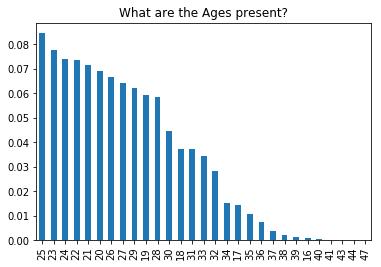

In [15]:
#the counts for each Club
Age_vals = fifa_df['Age'].value_counts()

# The below is a bar chart of the proportion 

(Age_vals/fifa_df.shape[0]).plot(kind="bar");
plt.title("What are the Ages present?");

# Question 2: From what countries the majority players come from?

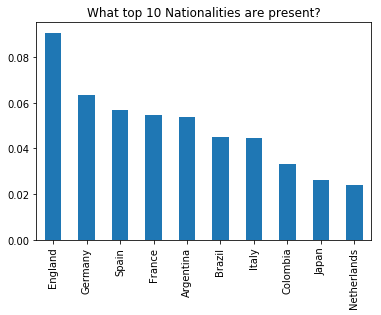

In [16]:
# the counts for each Club
Country_vals = fifa_df['Nationality'].value_counts()

# The below is a bar chart of the proportion 
(Country_vals[:10]/fifa_df.shape[0]).plot(kind="bar");
plt.title("What top 10 Nationalities are present?");


# Question 3: What are the most preferred positions?

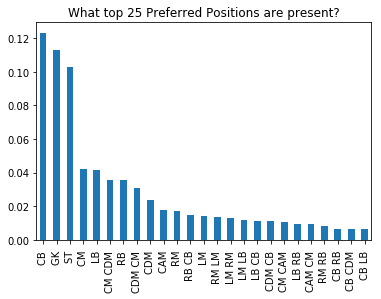

In [17]:
#the counts for each Club
Pos_vals = fifa_df['Preferred Positions'].value_counts()

# The below is a bar chart of the proportion 
(Pos_vals[:25]/fifa_df.shape[0]).plot(kind="bar");
plt.title("What top 25 Preferred Positions are present?");

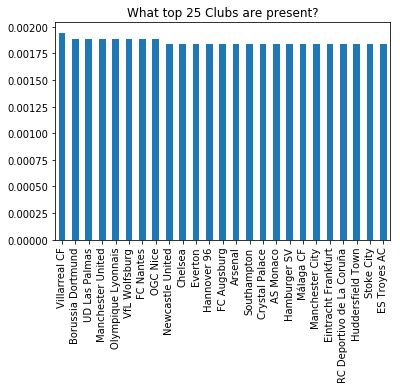

In [18]:
#the counts for each Club
Club_vals = fifa_df['Club'].value_counts()

# The below is a bar chart of the proportion 

(Club_vals[:25]/fifa_df.shape[0]).plot(kind="bar");
plt.title("What top 25 Clubs are present?");

# Question 4: Top 10 clubs with highest average player potential

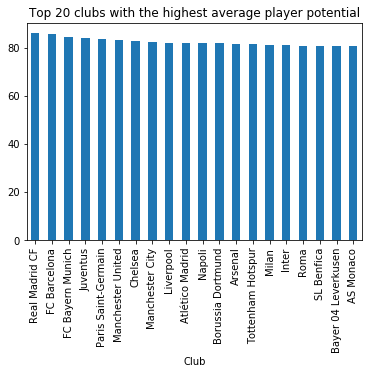

In [19]:
# Find out the top 20 clubs with the highest average player potential
fifa_df.groupby("Club")["Potential"].mean().sort_values(ascending=False).head(20).plot(kind="bar");
plt.title("Top 20 clubs with the highest average player potential");

# Question 5: Correlation between Player’s Age, Overall, Potential, Value and Wage

We need first to remove the unused columns for the remaining analysis. 
Then we'll need to have the onject-type columns, Value and Wage converted into numeric values to enable computation

In [21]:
# Drop unused columns for the analysis
columns_to_drop = ['Unnamed: 0', 'Photo', 'Flag', 'Club Logo', 'Special',
       'Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control',
       'Composure', 'Crossing', 'Curve', 'Dribbling', 'Finishing',
       'Free kick accuracy', 'GK diving', 'GK handling', 'GK kicking',
       'GK positioning', 'GK reflexes', 'Heading accuracy', 'Interceptions',
       'Jumping', 'Long passing', 'Long shots', 'Marking', 'Penalties',
       'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Standing tackle',
       'Strength', 'Vision', 'Volleys', 'CAM', 'CB', 'CDM', 'CF', 'CM', 'ID',
       'LAM', 'LB', 'LCB', 'LCM', 'LDM', 'LF', 'LM', 'LS', 'LW', 'LWB','RAM', 'RB', 'RCB', 'RCM', 'RDM', 'RF', 'RM',
       'RS', 'RW', 'RWB', 'ST']

fifa_df.drop(columns_to_drop, axis=1, inplace=True)

In [22]:
fifa_df.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Stamina,Preferred Positions
0,Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,€95.5M,€565K,92,ST LW
1,L. Messi,30,Argentina,93,93,FC Barcelona,€105M,€565K,73,RW
2,Neymar,25,Brazil,92,94,Paris Saint-Germain,€123M,€280K,78,LW
3,L. Suárez,30,Uruguay,92,92,FC Barcelona,€97M,€510K,89,ST
4,M. Neuer,31,Germany,92,92,FC Bayern Munich,€61M,€230K,44,GK


In [23]:
fifa_df.describe()

,Age,Overall,Potential
count,17981.000000,17981.000000,17981.000000
mean,25.144541,66.247984,71.190813
std,4.614272,6.987965,6.102199
min,16.000000,46.000000,46.000000
25%,21.000000,62.000000,67.000000
50%,25.000000,66.000000,71.000000
75%,28.000000,71.000000,75.000000
max,47.000000,94.000000,94.000000


In [24]:
# Convert value/wage string to number
# a function to convert Wage and Value of a player to a number
def str2number(amt):
    """
    This function convert amount string to float 
    
    Parameter:
    amount(str): Amount string with M & K as Abbreviation for Million and Thousands
    
    Returns:
    float: A float number represents the numerical value of the input parameter amount(str)
    """
    if amt[-1] == 'M':
        return float(amt[1:-1])*1000000
    elif amt[-1] == 'K':
        return float(amt[1:-1])*1000
    else:
        return float(amt[1:])

In [25]:
# Convert value, wage to number
fifa_df['Value_Million'] = fifa_df['Value'].apply(lambda x: str2number(x) / 1000000)
fifa_df['Wage_Thousand'] = fifa_df['Wage'].apply(lambda x: str2number(x) / 1000)

# Drop the original value & wage columns
fifa_df.drop(['Value', 'Wage'], axis=1, inplace=True)

In [26]:
fifa_df.head()

,Name,Age,Nationality,Overall,Potential,Club,Stamina,Preferred Positions,Value_Million,Wage_Thousand
0,Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,92,ST LW,95.5,565.0
1,L. Messi,30,Argentina,93,93,FC Barcelona,73,RW,105.0,565.0
2,Neymar,25,Brazil,92,94,Paris Saint-Germain,78,LW,123.0,280.0
3,L. Suárez,30,Uruguay,92,92,FC Barcelona,89,ST,97.0,510.0
4,M. Neuer,31,Germany,92,92,FC Bayern Munich,44,GK,61.0,230.0


The above shows that we now have the numeric value of the player value and wage of each player


In [27]:
#Correlation between Age, Overall, Potential, Value and Wage
corr_df = fifa_df[['Name', 'Age', 'Overall', 'Potential', 'Value_Million', 'Wage_Thousand']]

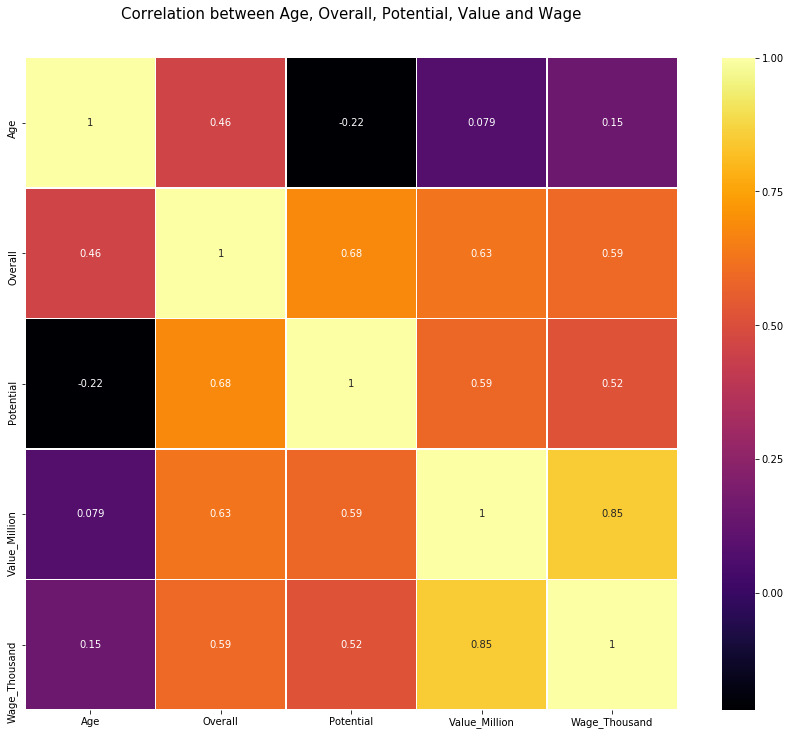

In [28]:
# print the heatmap showing the correlations 
colormap = plt.cm.inferno
plt.figure(figsize=(16,12))
plt.title('Correlation between Age, Overall, Potential, Value and Wage', y=1.05, size=15)
sns.heatmap(corr_df.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

We can quickly note that there is a positive correlation between overall rating of a player and his market value and his wage. It is obvious also the higher the market value, the higher the wage of the player.